In [6]:
!pip install pytorchvis

In [7]:
import torch
from torchvision import models
from pytorchvis.visualize_layers import VisualizeLayers

In [9]:
# load the Pytorch model
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
print (model)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

In [21]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)


vis = VisualizeLayers(model,layers='conv')
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


'"\n# move the input and model to GPU for speed if available\nif torch.cuda.is_available():\n    input_batch = input_batch.to(\'cuda\')\n    model.to(\'cuda\')\n'

In [24]:
# create an object of VisualizeLayers and initialize it with the model and 
# the layers whose output you want to visualize
#vis = VisualizeLayers(model,layers='conv')
# load the input
#x = torch.randn([1,3,224,224])
# pass the input and get the output
#with torch.no_grad():
output = model(input_batch)
# get the intermediate layers output which was passed during initialization
interm_output = vis.get_interm_output()

conv1_conv_Conv2d
bn1_batchnorm_BatchNorm2d
relu_activation_ReLU
maxpool_pooling_MaxPool2d
layer1_container_Sequential
	 layer1.0_resnet_Bottleneck
	 0.conv1_conv_Conv2d
	 0.bn1_batchnorm_BatchNorm2d
	 0.conv2_conv_Conv2d
	 0.bn2_batchnorm_BatchNorm2d
	 0.conv3_conv_Conv2d
	 0.bn3_batchnorm_BatchNorm2d
	 0.relu_activation_ReLU
	 0.downsample_container_Sequential
	 downsample.0_conv_Conv2d
	 downsample.1_batchnorm_BatchNorm2d
	 layer1.1_resnet_Bottleneck
	 1.conv1_conv_Conv2d
	 1.bn1_batchnorm_BatchNorm2d
	 1.conv2_conv_Conv2d
	 1.bn2_batchnorm_BatchNorm2d
	 1.conv3_conv_Conv2d
	 1.bn3_batchnorm_BatchNorm2d
	 1.relu_activation_ReLU
	 layer1.2_resnet_Bottleneck
	 2.conv1_conv_Conv2d
	 2.bn1_batchnorm_BatchNorm2d
	 2.conv2_conv_Conv2d
	 2.bn2_batchnorm_BatchNorm2d
	 2.conv3_conv_Conv2d
	 2.bn3_batchnorm_BatchNorm2d
	 2.relu_activation_ReLU
layer2_container_Sequential
	 layer2.0_resnet_Bottleneck
	 0.conv1_conv_Conv2d
	 0.bn1_batchnorm_BatchNorm2d
	 0.conv2_conv_Conv2d
	 0.bn2_batchnorm_Ba

RuntimeError: ignored

In [18]:
# plot the featuremap of the layer which you want, to see what are the layers
# saved simply call vis.get_saved_layer_names
output_layers=vis.get_saved_layer_names()
output_layers

['conv1_conv_Conv2d',
 '0.conv1_conv_Conv2d',
 '0.conv2_conv_Conv2d',
 '0.conv3_conv_Conv2d',
 'downsample.0_conv_Conv2d',
 '1.conv1_conv_Conv2d',
 '1.conv2_conv_Conv2d',
 '1.conv3_conv_Conv2d',
 '2.conv1_conv_Conv2d',
 '2.conv2_conv_Conv2d',
 '2.conv3_conv_Conv2d',
 '0.conv1_conv_Conv2d',
 '0.conv2_conv_Conv2d',
 '0.conv3_conv_Conv2d',
 'downsample.0_conv_Conv2d',
 '1.conv1_conv_Conv2d',
 '1.conv2_conv_Conv2d',
 '1.conv3_conv_Conv2d',
 '2.conv1_conv_Conv2d',
 '2.conv2_conv_Conv2d',
 '2.conv3_conv_Conv2d',
 '3.conv1_conv_Conv2d',
 '3.conv2_conv_Conv2d',
 '3.conv3_conv_Conv2d',
 '0.conv1_conv_Conv2d',
 '0.conv2_conv_Conv2d',
 '0.conv3_conv_Conv2d',
 'downsample.0_conv_Conv2d',
 '1.conv1_conv_Conv2d',
 '1.conv2_conv_Conv2d',
 '1.conv3_conv_Conv2d',
 '2.conv1_conv_Conv2d',
 '2.conv2_conv_Conv2d',
 '2.conv3_conv_Conv2d',
 '3.conv1_conv_Conv2d',
 '3.conv2_conv_Conv2d',
 '3.conv3_conv_Conv2d',
 '4.conv1_conv_Conv2d',
 '4.conv2_conv_Conv2d',
 '4.conv3_conv_Conv2d',
 '5.conv1_conv_Conv2d',
 '5

TypeError: ignored

<Figure size 432x288 with 0 Axes>

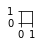

In [19]:
vis.plot_featuremaps(interm_output['downsample.0_conv_Conv2d'],name='fmaps',color_map='gray',savefig=False)


Number of output maps: 2048


<Figure size 432x288 with 0 Axes>

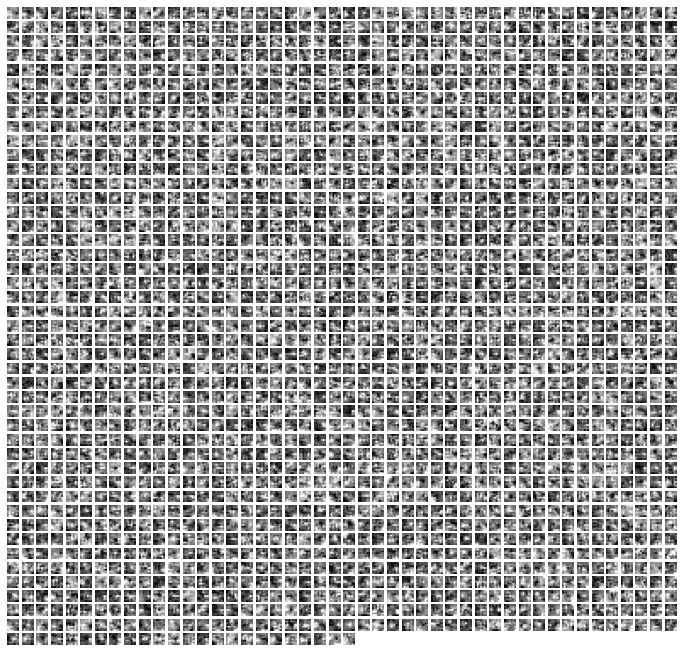

In [15]:
# to plot the intermediate 
vis.plot_featuremaps(interm_output[output_layers[-1]],name='fmaps',color_map='gray',savefig=False)